<a href="https://colab.research.google.com/github/ihyaulumuddin044/machineLearning/blob/main/prototype_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
This dataset helps estimate obesity levels based on eating habits, family history and physical condition. It includes data from individuals in Mexico, Peru, and Colombia, covering 16 lifestyle and health-related features with 2111 records. The labels classify obesity levels, ranging from underweight to different obesity types.

Most of the data was generated using synthetic techniques, while some were collected directly from users through a web platform. It is useful for classification, regression, and clustering tasks.

Source: UCI Machine Learning Repository

Inspiration:
Understanding lifestyle factors that contribute to obesity can help with early intervention, health recommendations, and machine learning applications in healthcare.

Column Descriptions:
Gender – Male or Female.
Age – The person’s age in years.
Height – Height in meters.
Weight – Weight in kilograms.
family_history_with_overweight – Whether the person has a family history of being overweight (yes/no).
FAVC – If the person frequently consumes high-calorie foods (yes/no).
FCVC – Frequency of vegetable consumption (scale from 1 to 3).
NCP – Number of main meals per day.
CAEC – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).
SMOKE – Whether the person smokes (yes/no).
CH2O – Daily water intake (scale from 1 to 3).
SCC – If the person monitors their calorie intake (yes/no).
FAF – Physical activity frequency (scale from 0 to 3).
TUE – Time spent using technology (scale from 0 to 3).
CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).
MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [40]:
df = pd.read_csv('ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


#EDA

In [41]:
# Memahami Struktur Data

# Tinjau jumlah baris dan kolom dalam dataset.
df.shape

(2111, 16)

In [42]:
# Tinjau jenis data di setiap kolom (numerikal atau kategorikal).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [43]:
# datayang hilang
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [44]:
# Statistik deskriptif
df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.00000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,211.00344
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,317.06696
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.00000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.00000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,1.61600
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,422.00000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,999.00000


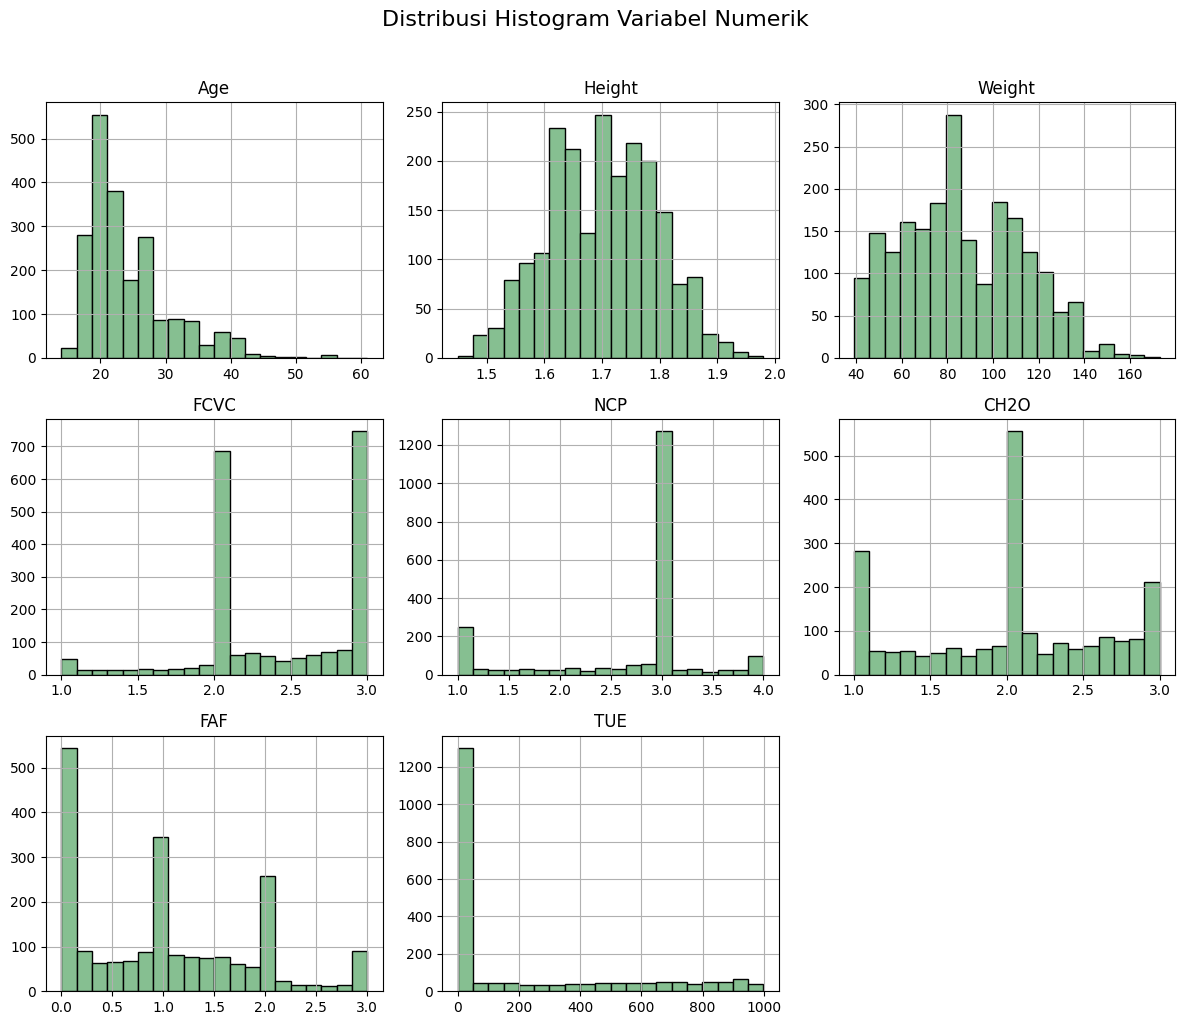

In [45]:


df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].hist(
    figsize=(12, 10), bins=20, color='#86bf91', edgecolor='black'
)
plt.suptitle('Distribusi Histogram Variabel Numerik', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


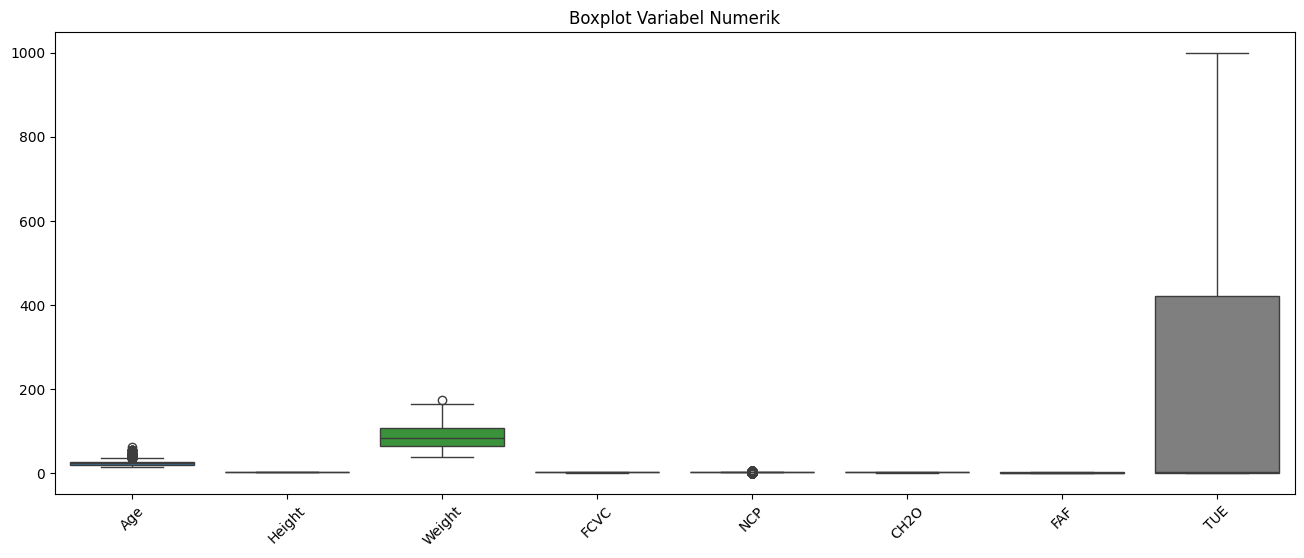

In [46]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])
plt.title('Boxplot Variabel Numerik')
plt.xticks(rotation=45)
plt.show()


<ipython-input-47-8cab3dfb0e5f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-47-8cab3dfb0e5f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-47-8cab3dfb0e5f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
<ipython-input-47-8cab3dfb0e5f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

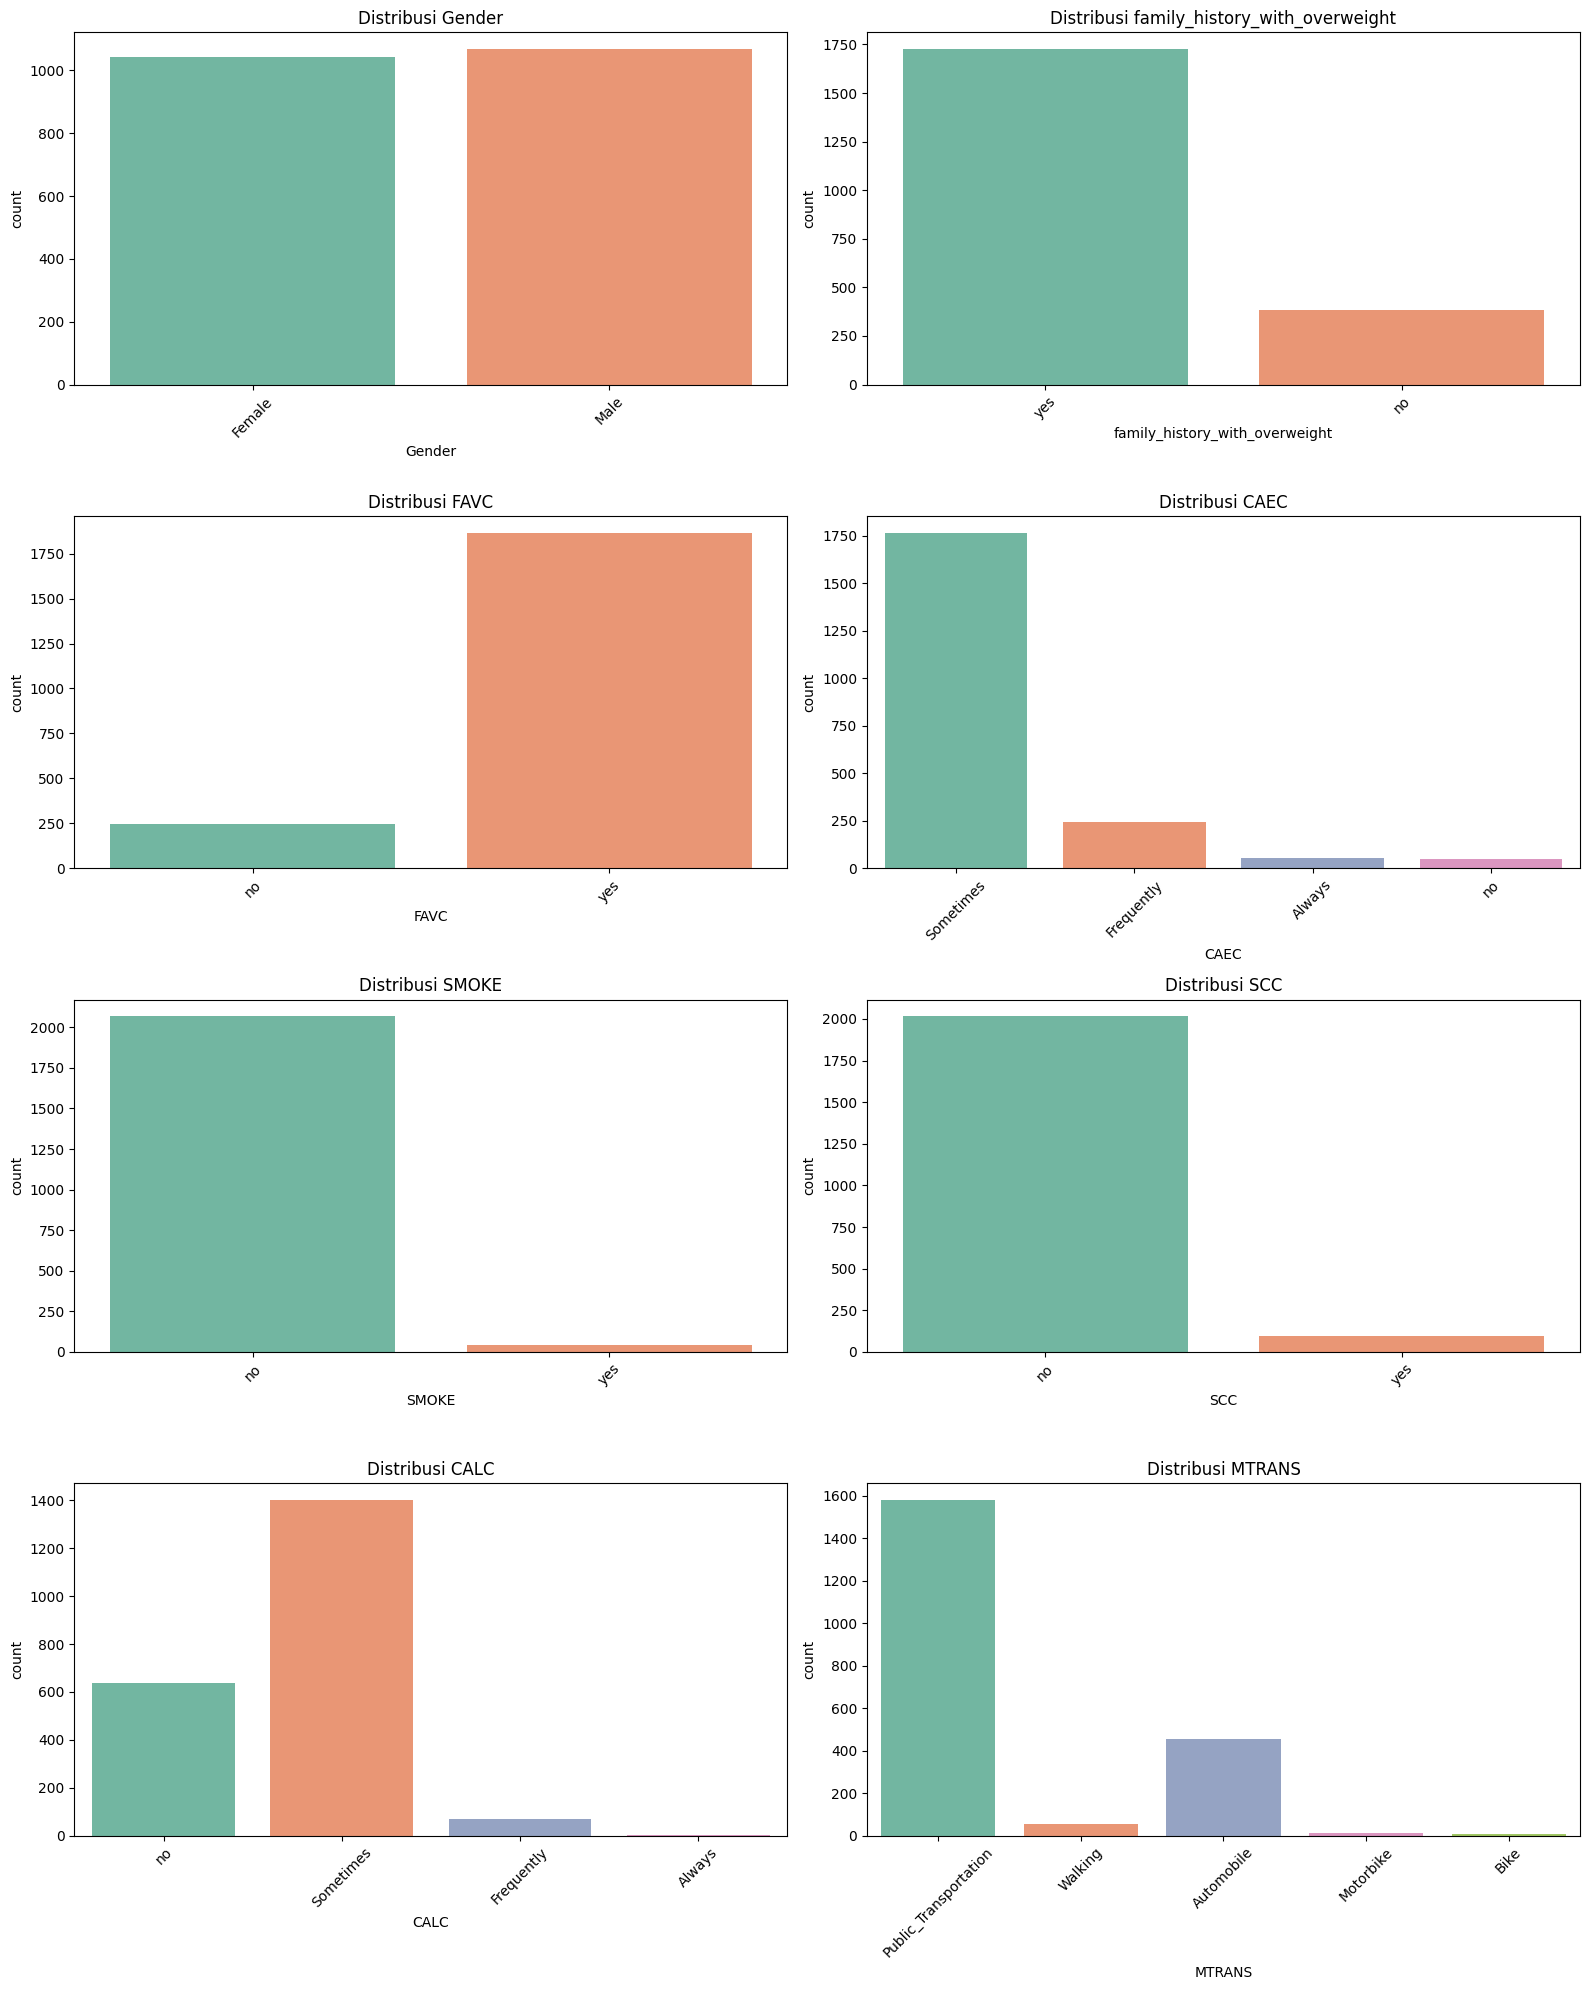

In [47]:
#  data kategorikal
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

plt.figure(figsize=(16, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 2, i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

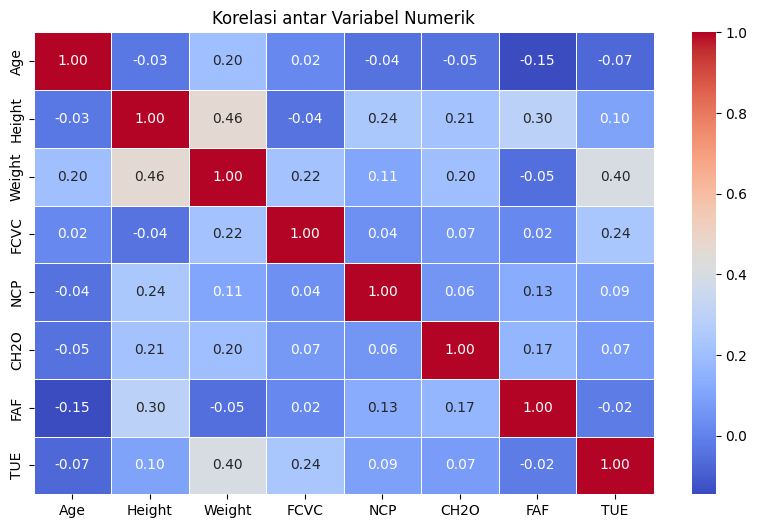

In [48]:
# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
corr = numeric_df.corr()

# Tampilkan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antar Variabel Numerik')
plt.show()

 # Data Presocessing

In [49]:
# Salin data untuk diproses
df_processed = df.copy()

# Label encoding untuk kolom kategorikal biner
label_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
le = LabelEncoder()
for col in label_cols:
    df_processed[col] = le.fit_transform(df_processed[col])

In [50]:
# One-hot encoding untuk kolom kategorikal multi-kategori
df_processed = pd.get_dummies(df_processed, columns=['CAEC', 'CALC', 'MTRANS'])

# Normalisasi kolom numerik
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

# Lihat hasil akhir
df_processed.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,-0.521741,-0.874380,-0.862558,1,0,-0.784810,0.404102,0,-0.013141,0,-1.188028,-0.662488,False,False,True,False,False,False,False,True,False,False,False,True,False
1,0,-0.521741,-1.945660,-1.168077,1,0,1.088307,0.404102,1,1.618701,1,2.339676,-0.665643,False,False,True,False,False,False,True,False,False,False,False,True,False
2,1,-0.207057,1.053924,-0.366089,1,0,-0.784810,0.404102,0,-0.013141,0,1.163774,-0.662488,False,False,True,False,False,True,False,False,False,False,False,True,False
3,1,0.422312,1.053924,0.015809,0,0,1.088307,0.404102,0,-0.013141,0,1.163774,-0.665643,False,False,True,False,False,True,False,False,False,False,False,False,True
4,1,-0.364399,0.839668,0.122741,0,0,-0.784810,-2.166941,0,-0.013141,0,-1.188028,-0.665643,False,False,True,False,False,False,True,False,False,False,False,True,False


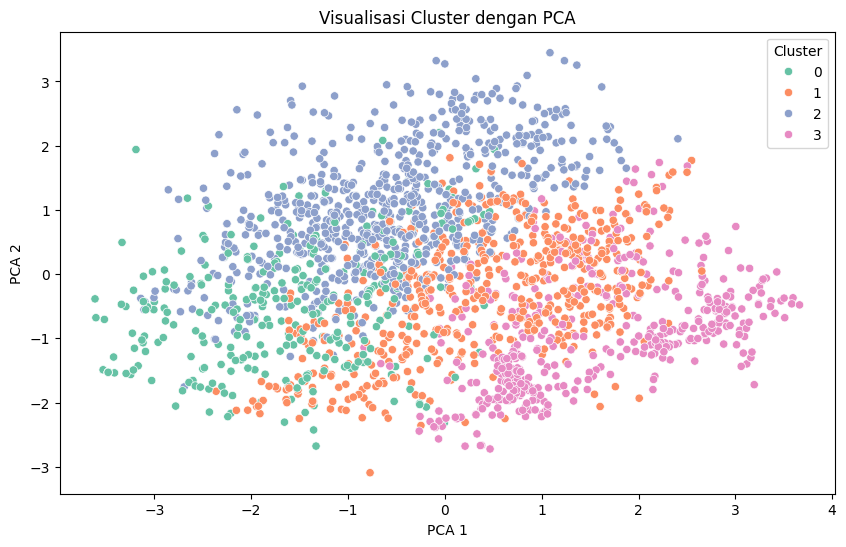

In [60]:
# Buat model
kmeans = KMeans(n_clusters=4, random_state=42)
df_processed['Cluster'] = kmeans.fit_predict(df_processed)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(df_processed.drop(columns='Cluster'))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df_processed['Cluster'], palette='Set2')
plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


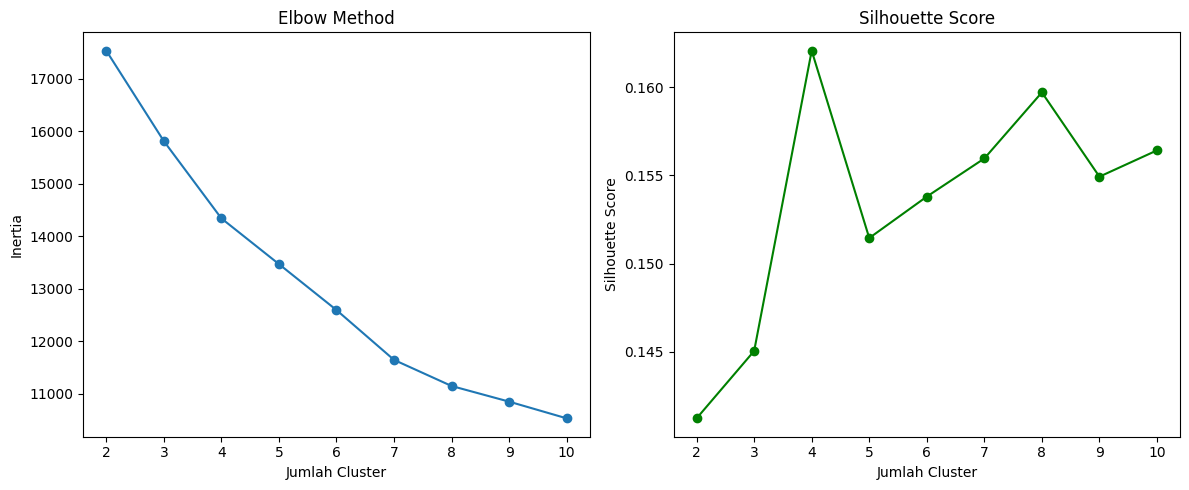

In [58]:
inertia = []
silhouette = []
range_n_clusters = range(2, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_processed)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_processed, kmeans.labels_))

# Plot Elbow dan Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette, marker='o', color='green')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [89]:
#  DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Encode data kategorikal
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Standardisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)


# Buat model DBSCAN
# dbscan = DBSCAN(eps=2.8, min_samples=5)  # kamu bisa eksperimen dengan eps
# labels = dbscan.fit_predict(df_scaled)

# Tambahkan label ke DataFrame
df_encoded['Cluster'] = labels

# Contoh: coba eps lebih tinggi
dbscan = DBSCAN(eps=1.0, min_samples=5)
labels = dbscan.fit_predict(df_scaled)

# Evaluasi ulang
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
sil_score = silhouette_score(df_scaled, labels) if n_clusters > 1 else -1
print(f"Jumlah cluster ditemukan: {n_clusters}")
print(f"Silhouette Score: {sil_score:.4f}")



Jumlah cluster ditemukan: 44
Silhouette Score: -0.1314


Jumlah cluster ditemukan: 9
Silhouette Score: 0.0538


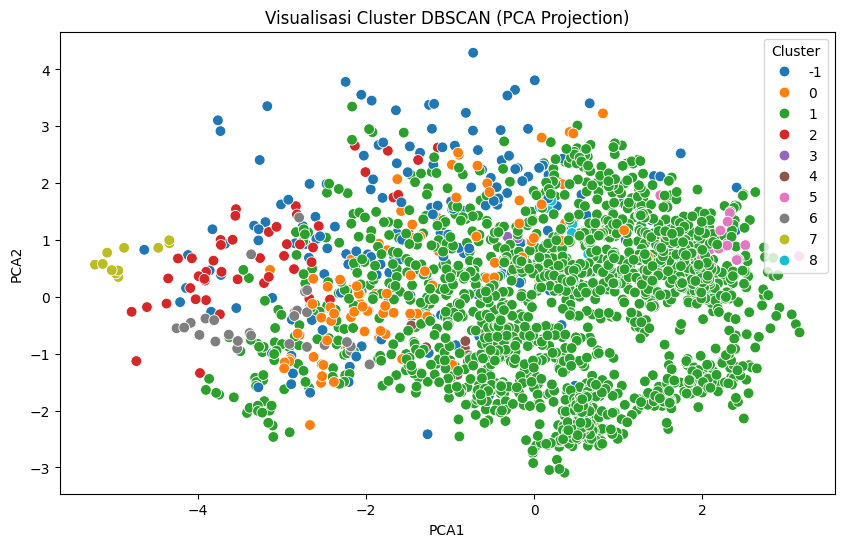

In [82]:
# Hitung silhouette score
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
sil_score = silhouette_score(df_scaled, labels) if n_clusters > 1 else -1

print(f"Jumlah cluster ditemukan: {n_clusters}")
print(f"Silhouette Score: {sil_score:.4f}")

# Visualisasi hasil cluster dengan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_encoded['PCA1'] = df_pca[:, 0]
df_encoded['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=60)
plt.title('Visualisasi Cluster DBSCAN (PCA Projection)')
plt.show()


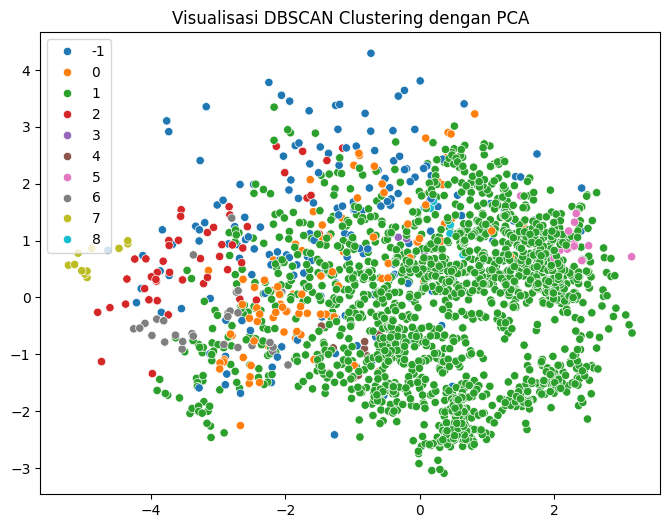

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
components = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=labels, palette='tab10', legend='full')
plt.title("Visualisasi DBSCAN Clustering dengan PCA")
plt.show()
